# List Comprehension

Today we will analyze some real world data in Python. Before doing that, let's introduce another basic tool in Python: list comprehension.

This is a compact way to generate lists that avoids writing a bunch of `for` loops. 

Let's look at an example. Suppose I want to create a list containing the squares of elements in a given list.

In [1]:
L = [1,2,3,4]

# One option
squares_forLoop = []
for j in L:
    squares_forLoop.append(j*j)
    
# List comprehension version
squares_listComprehension = [j*j for j in L]

print(squares_forLoop)
print(squares_listComprehension)

[1, 4, 9, 16]
[1, 4, 9, 16]


The "list comprehension" version is equivalent to the `for` loop version. The only difference is cleaner looking code. 

Conditions in the list comphrension code can be more complex. Suppose that we want to take a sentence and pull out all digits which appear in the sentence. We will use the built-in function `x.isdigit()` which returns `True` if `x` is a digit and `False` otherwise.

In [2]:
sentence = 'This is a 1234 sentence 567'

# List comprehension version
digits_LC = [x for x in sentence if x.isdigit()]

# For loop version
digits_FL = []
for x in sentence:
    if x.isdigit():
        digits_FL.append(x)


print(digits_LC)
print(digits_FL)

['1', '2', '3', '4', '5', '6', '7']
['1', '2', '3', '4', '5', '6', '7']


List comprehensions can also contain multiple `for` loops. Let's create a flattened version of  a list of lists: i.e. a single list containing all entries of the input.

In [3]:
A = [[1,2],[3,4]]

flattened = [x for row in A for x in row]
flattened

[1, 2, 3, 4]

### Exercise

For the lists `L` and `M` below, create a new list `N` containing elements of `L` which do not appear in `M`. 

In [4]:
# Input lists
L = list(range(25))
M = [1,4,20,22,35]

# Create N below


### List Comprehension vs. Map

The examples that we did above could have been accomplished using `map` and `lambda` (or just a plain `for` loop). The method that you choose is more-or-less a judgment call. 

Remember an overarching goal: produce efficient, but readable code! 

The `map` function can do some things that list comprehension cannot (see the 'lazy evaluation' example from last time). It can also give small speed advantages if you are mapping a function which is already defined. On the other hand, for a very complicated list, it might make more sense to just use a `for` loop for the sake of readability

In general, I think that most people prefer to use list comphrehension where possible.

# Reading and Cleaning Data

Last time we studied statistics on some data that we generated. Now let's try to work with some real world data. There are many powerful Python packages for data wrangling, analysis and visualization. To start, we will just work in basic Python and write our own functions as needed.

We start by writing a function to read a file into Python.

In [5]:
def read_file(file_name):
    file = open(file_name) # Gets 'file_name' as a file object
    data = file.read() # Reads the file object into a string object
    file.close() # Closes the file object, since we don't need it any more
    return data

Now we use our function to read the 'global_temperature_anomaly.csv' file into Python. This file is saved in the 'data' folder, so we need to tell Python where to find it. The '.csv' extension means that the data is stored as 'comma separated values'.

In [7]:
data_as_string = read_file('data/global_temperature_anomaly.csv')

In [8]:
# Check the length of the string
len(data_as_string)

1796

In [9]:
# We can view a part of the data by looking at a slice
data_as_string[:600]

'# Source: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature\n# Data source: https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv\n# Global Land and Ocean Temperature Anomalies, January-December\n# Units: Degrees Celsius\n# Base Period: 1901-2000\n# Missing: -999\n# Year,Value\n1880,-0.12\n1881,-0.07\n1882,-0.07\n1883,-0.15\n1884,-0.21\n1885,-0.22\n1886,-0.21\n1887,-0.25\n1888,-0.15\n1889,-0.10\n1890,-0.33\n1891,-0.25\n1892,-0.30\n1893,-0.31\n1894,-0.28\n1895,-0.22\n1896,-0.09\n1897,-0.12\n1898,-0.26\n1899,-0.12\n1900,-0.07\n1901,-0.14\n1902,-0.2'

This looks like a mess. We can infer that `\n` is code for 'new line'. This would probably look better if we split the data into a list of lines. There is a built-in function to split a string into a list, given a marker. 

In [10]:
data_as_lines = data_as_string.split('\n')
# file_name.split(marker) turns the string into a list, 
# where marker tells us when to start a new entry in the list

data_as_lines[:20]

['# Source: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature',
 '# Data source: https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv',
 '# Global Land and Ocean Temperature Anomalies, January-December',
 '# Units: Degrees Celsius',
 '# Base Period: 1901-2000',
 '# Missing: -999',
 '# Year,Value',
 '1880,-0.12',
 '1881,-0.07',
 '1882,-0.07',
 '1883,-0.15',
 '1884,-0.21',
 '1885,-0.22',
 '1886,-0.21',
 '1887,-0.25',
 '1888,-0.15',
 '1889,-0.10',
 '1890,-0.33',
 '1891,-0.25',
 '1892,-0.30']

This already looks better! The data records the discrepancy between the average temperature over a given year and the average temperature over the time period 1901-2000 (called  temperature anomalies).

Typically, raw data files come with a bunch of 'metadata' giving some description of the data. This is necessary for context, but not useful for the actual data analysis. We shoud 'clean' the data by removing the metadata at the top. 

The structure of this particular data file is simple. If we look at the full data set, we see that it is already pretty clean after the header. Then we can just count how many lines the metadata takes up and remove them.

In [11]:
data_as_lines

['# Source: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature',
 '# Data source: https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv',
 '# Global Land and Ocean Temperature Anomalies, January-December',
 '# Units: Degrees Celsius',
 '# Base Period: 1901-2000',
 '# Missing: -999',
 '# Year,Value',
 '1880,-0.12',
 '1881,-0.07',
 '1882,-0.07',
 '1883,-0.15',
 '1884,-0.21',
 '1885,-0.22',
 '1886,-0.21',
 '1887,-0.25',
 '1888,-0.15',
 '1889,-0.10',
 '1890,-0.33',
 '1891,-0.25',
 '1892,-0.30',
 '1893,-0.31',
 '1894,-0.28',
 '1895,-0.22',
 '1896,-0.09',
 '1897,-0.12',
 '1898,-0.26',
 '1899,-0.12',
 '1900,-0.07',
 '1901,-0.14',
 '1902,-0.25',
 '1903,-0.34',
 '1904,-0.42',
 '1905,-0.29',
 '1906,-0.22',
 '1907,-0.37',
 '1908,-0.44',
 '1909,-0.43',
 '1910,-0.38',
 '1911,-0.43',
 '1912,-0.33',
 '1913,-0.31',
 '1914,-0.14',
 '1915,-0.07',
 '1916,-0.29',
 '1917,-0.31',
 '1918,-0.20',
 '1919,-0.20',
 '1920,-0.21',
 '1921,-

Looks like trimming the first 7 lines off would almost do the trick. If the dataset was messier (or if there was just more metadata), then we wouldn't want to eyeball it. For the sake of flexibility, let's write a function to help us explore data.

In [12]:
# This function prints a list with a line number in front of it.
def print_list(list):
    i = 0
    for item in list:
        print(i, item)
        i = i + 1
    return

# Let's run it on our data right away
print_list(data_as_lines)

0 # Source: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature
1 # Data source: https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv
2 # Global Land and Ocean Temperature Anomalies, January-December
3 # Units: Degrees Celsius
4 # Base Period: 1901-2000
5 # Missing: -999
6 # Year,Value
7 1880,-0.12
8 1881,-0.07
9 1882,-0.07
10 1883,-0.15
11 1884,-0.21
12 1885,-0.22
13 1886,-0.21
14 1887,-0.25
15 1888,-0.15
16 1889,-0.10
17 1890,-0.33
18 1891,-0.25
19 1892,-0.30
20 1893,-0.31
21 1894,-0.28
22 1895,-0.22
23 1896,-0.09
24 1897,-0.12
25 1898,-0.26
26 1899,-0.12
27 1900,-0.07
28 1901,-0.14
29 1902,-0.25
30 1903,-0.34
31 1904,-0.42
32 1905,-0.29
33 1906,-0.22
34 1907,-0.37
35 1908,-0.44
36 1909,-0.43
37 1910,-0.38
38 1911,-0.43
39 1912,-0.33
40 1913,-0.31
41 1914,-0.14
42 1915,-0.07
43 1916,-0.29
44 1917,-0.31
45 1918,-0.20
46 1919,-0.20
47 1920,-0.21
48 1921,-0.14
49 1922,-0.22
50 1923,-0.21
51 1924,-0.24
52 1925,-0

Indeed, we want to trim off the first 7 lines. There is also a blank line at the end that we want to get rid of.

In [13]:
good_lines = data_as_lines[7:-1]  
# The '-1' says we slice up to the second-to-last entry

good_lines

['1880,-0.12',
 '1881,-0.07',
 '1882,-0.07',
 '1883,-0.15',
 '1884,-0.21',
 '1885,-0.22',
 '1886,-0.21',
 '1887,-0.25',
 '1888,-0.15',
 '1889,-0.10',
 '1890,-0.33',
 '1891,-0.25',
 '1892,-0.30',
 '1893,-0.31',
 '1894,-0.28',
 '1895,-0.22',
 '1896,-0.09',
 '1897,-0.12',
 '1898,-0.26',
 '1899,-0.12',
 '1900,-0.07',
 '1901,-0.14',
 '1902,-0.25',
 '1903,-0.34',
 '1904,-0.42',
 '1905,-0.29',
 '1906,-0.22',
 '1907,-0.37',
 '1908,-0.44',
 '1909,-0.43',
 '1910,-0.38',
 '1911,-0.43',
 '1912,-0.33',
 '1913,-0.31',
 '1914,-0.14',
 '1915,-0.07',
 '1916,-0.29',
 '1917,-0.31',
 '1918,-0.20',
 '1919,-0.20',
 '1920,-0.21',
 '1921,-0.14',
 '1922,-0.22',
 '1923,-0.21',
 '1924,-0.24',
 '1925,-0.14',
 '1926,-0.06',
 '1927,-0.14',
 '1928,-0.17',
 '1929,-0.29',
 '1930,-0.09',
 '1931,-0.07',
 '1932,-0.11',
 '1933,-0.24',
 '1934,-0.10',
 '1935,-0.14',
 '1936,-0.11',
 '1937,-0.01',
 '1938,-0.02',
 '1939,-0.01',
 '1940,0.10',
 '1941,0.19',
 '1942,0.15',
 '1943,0.16',
 '1944,0.29',
 '1945,0.17',
 '1946,-0.01',
 

Our data is starting to look pretty clean. Now each entry in the list is of the form `'year,temperature_anomaly'`. It would be more useful to split each of these into its own list `[year, temperature_anomaly]`.

### Exercise

Create a list called `data`. Each entry in `data` should be a list of the form `[year, temperature_anomaly]`.

In [15]:
# Create the list below.
data = [x.split(',') for x in good_lines]

# Let's look at a slice of the clean data.
data[:4]

[['1880', '-0.12'], ['1881', '-0.07'], ['1882', '-0.07'], ['1883', '-0.15']]

### Exercise

Split the data into two lists: `years` is a list of all of the years and `anomalies` is a list of all anomalies. This can be done using `for` loops, `lambda` functions or list comprhension. Try to do it using list comphrehension!

<b>Important: </b> The data is currently stored as strings. We want to store all numbers in both lists as floating point numbers in order to analyze it!

In [16]:
years = [float(x[0]) for x in data]
anomalies = [float(x[1]) for x in data]

Now that we have completely clean data, we can visualize it. Let's plot the temperature anomalies against the years.

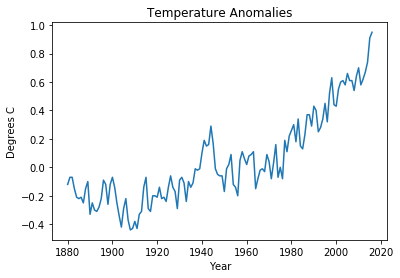

In [18]:
from matplotlib import pyplot as plt

plt.plot(years, anomalies)
plt.title("Temperature Anomalies")
plt.ylabel("Degrees C")
plt.xlabel("Year")

plt.show()

# Trends in the Data

We see a clear upward trend in the anomaly data. We now explore some techniques to visualize these trends more effectively. 

## Smoothing the Data

The data is rather noisy: there is lots of short-term variation which may obscure the long-term trend. One approach to removing some of the short-term variation from the picture is to 'smooth' the data.

Now we smooth the data using a 'sliding window' approach. Think of the data as a list of ordered pairs $(x,f(x))$ with $x$ a year and $f(x)$ the temperature anomaly for that year. Pick a window length $W$. We construct a new function $F$ defined for each point $x$ in the domain by setting $F(x)$ to be the average value of $f$ over the set $\{x,x+1,\ldots,x+W\}$.

In [19]:
def smooth(data, window):
    output = [] # Initialize with an empty list. We will fill in the values with a for loop.
    n = len(data)
    for k in range(n - window + 1): 
        # For values of k which are too large, the data won't be defined on the whole window!
        segment = data[k:(k + window)] # Pick out the slice of the data in the window.
        value = sum(segment)/window # Average value over the slice
        output.append(value)
    return output

# Note: I used a for loop in this function because (to me) it is more readable than 
# list comprehension and it allowed me to add comments.

# The following function returns the original data, restricted to the domain of the smooth data.
def drop_window(data, window):
    return data[:-(window-1)]

Now let's plot the data and the smoothed data.

128 128 128


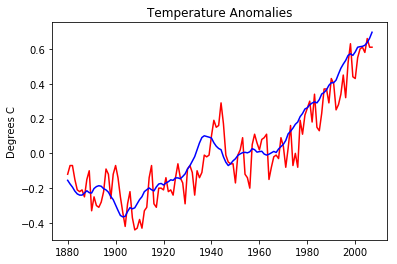

In [20]:
window = 10 # Play with this parameter to see the effect of changing the window size
years2 = drop_window(years, window)
anomalies1 = drop_window(anomalies, window)
anomalies2 = smooth(anomalies,window)

print (len(years2), len(anomalies1), len(anomalies2))

plt.plot( years2, anomalies1, color='red', linestyle='solid')
plt.plot( years2, anomalies2, color='blue', linestyle='solid')
plt.title("Temperature Anomalies")
plt.ylabel("Degrees C")

plt.show()

# If you want to save your figure, uncomment the next line:
# plt.savefig('smoothed_anomalies.png')

## Fitting the Data

Another common approach to understanding trends in the data would be to approximate it as well as possible by a simpler function. The most obvious class of functions to use would be polynomials. 

Once again, consider our data as a collection of pairs $(x,f(x))$ (in our example, $x$ is the year and $f(x)$ is the corresponding anomaly), with $x \in \{x_1,\ldots,x_N\}$. Fix a degree $d$. The goal is to find a degree-$d$ polynomial
$$
p(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_d x^d
$$
such that $p$ minimizes the total squared error:
$$
\sum_{i=1}^N (f(x_i) - p(x_i))^2.
$$

The numpy package has a built-in function to find the best-fitting polynomial. Let's use it on our anomaly data to find the best-fitting degree-$1$ polynomial.

In [21]:
import numpy as np

m, b = np.polyfit(years, anomalies, 1)
# The input of polyfit is a list of x values, a list of values f(x), and a degree
# The output is the coefficients of the best-fitting polynomial. 
# Since we are using degree-1, the output is a slope and an intercept.
# In general, the output is of the form c_d, c_{d-1}, ... , c_1, c_0 (using the notation above).

# The degree-1 polynomial of best fit is given by:
p = lambda x:m*x+b

Now that we have our best-fitting degree-1 polynomial, we can graph it together with the graph of the true data to visualize how well it really fits.

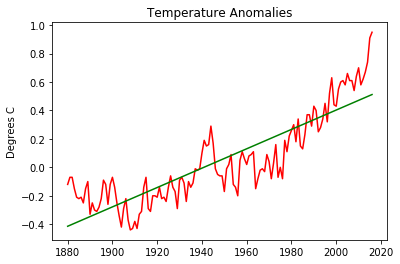

In [22]:
# Make a list by applying p(x) to the years in the data set
linfit = [p(x) for x in years]

# Draw the data and the line

plt.plot(years, anomalies, color='red', linestyle='solid')
plt.plot( years, linfit, color='green', linestyle='solid')
plt.title("Temperature Anomalies")
plt.ylabel("Degrees C")

plt.show()

We can use our linear function to make a prediction about the temperature anomaly in the future. This is called (linear) regression.

In [23]:
prediction = p(2040)
print("Predicted Temperature Anomaly in year 2040: ", prediction)

Predicted Temperature Anomaly in year 2040:  0.6754358093602448


### Exercise

Does this prediction seem accurate? (The answer is 'no'.)

Improve the prediction by using different parameters in polyfit. Justify your claim that your prediction is better by producing a convincing plot. How do we determine what is really the 'correct' fit?

Adjusting the parameters in polyfit too much will 'overfit' the polynomial to the data. Produce a plot to illustrate this phenomenon.

You could speed up your experiments by writing a function which finds the best-fitting degree-$d$ function in a single step.

Use various prediction models to predict when the temperature anomaly will exceed 2 degrees Celsius.

Predicted temperature anomaly in 2040: 1.209735377005586


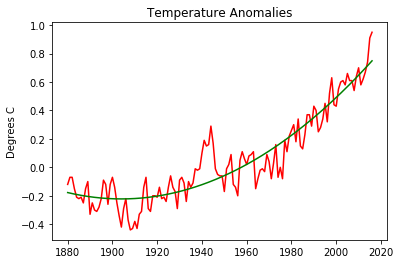

In [26]:
d = 2 # Degree parameter can be changed

coeffs = np.polyfit(years, anomalies, d)

def p(x):
    result = 0
    for j in range(0,d+1):
        result = result + coeffs[j]*x**(d-j)
    return result

prediction = p(2040)
print("Predicted temperature anomaly in 2040:", prediction)

# Make a list by applying p(x) to the years in the data set
bestfit = list(map(lambda x: p(x), years))

# Draw the data and the line

plt.plot(years, anomalies, color='red', linestyle='solid')
plt.plot( years, bestfit, color='green', linestyle='solid')
plt.title("Temperature Anomalies")
plt.ylabel("Degrees C")

plt.show()

In [27]:
year = 2020

while p(year) < 2:
    year = year+1
    
print(year)

2074


### Homework

In the 'data' folder, you will also find data on the sea level since 1993. Using similar methods to what was used here, analyze this sea level data. In particular, try to predict the sea level in 2040. Use the "smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed )  with respect to 20-year mean". This dataset will take a lot more work to explore and clean!